In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plot_analysis_result as plot
import importlib
import glob
importlib.reload(plot)
input_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/after_Smooth/question_2'
output_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/after_Smooth/question_2'
fn_list = glob.glob(f'{input_folder}/result_*.txt.gz')
os.makedirs(output_folder, exist_ok=True)
import importlib
importlib.reload(plot)
result_df = plot.read_all_result_files(input_folder, methods=['simpleSmooth', 'simpleSolver'])

       N     G  time_traverse_gene  label_time  vary_bin_kb  vary_fold  h_bin  \
0  27000  27.0                27.0           5          1.0      0.001    0.1   
1  27000  27.0                27.0           5          1.0      0.001    0.5   
2  27000  27.0                27.0           5          1.0      0.001    1.0   
3  27000  27.0                27.0           5          1.0      0.100    0.1   
4  27000  27.0                27.0           5          1.0      0.100    0.5   

                                           elongf_fn  \
0  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   
1  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   
2  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   
3  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   
4  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   

                                           output_fn  wMSE_simpleSmooth  \
0  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...           0.075959   
1  /gladstone/engelhardt/l

In [6]:
# plot5: Compare the performance of different solvers, across different true_h for only one case:
import importlib
importlib.reload(plot)
run_fn_list = [f'{input_folder}/result_{i}.txt.gz' for i in range(len(fn_list))]
run_df_list = list(map(lambda x: plot.read_one_result_raw(x, result_df, methods = ['simpleSmooth', 'simpleSolver']), run_fn_list))
run_df = pd.concat(run_df_list)

['0.1' '0.5' '1.0']
{'simpleSolver_0.1': <matplotlib.lines.Line2D object at 0x7f0fec58fc10>, 'simpleSmooth_0.1': <matplotlib.lines.Line2D object at 0x7f0fec5c9550>, 'simpleSolver_0.5': <matplotlib.lines.Line2D object at 0x7f0fec638ed0>, 'simpleSmooth_0.5': <matplotlib.lines.Line2D object at 0x7f0fec465810>, 'simpleSolver_1.0': <matplotlib.lines.Line2D object at 0x7f0fec4749d0>, 'simpleSmooth_1.0': <matplotlib.lines.Line2D object at 0x7f0fec475410>, 'true_h_0.1': <matplotlib.lines.Line2D object at 0x7f0fec475e10>}


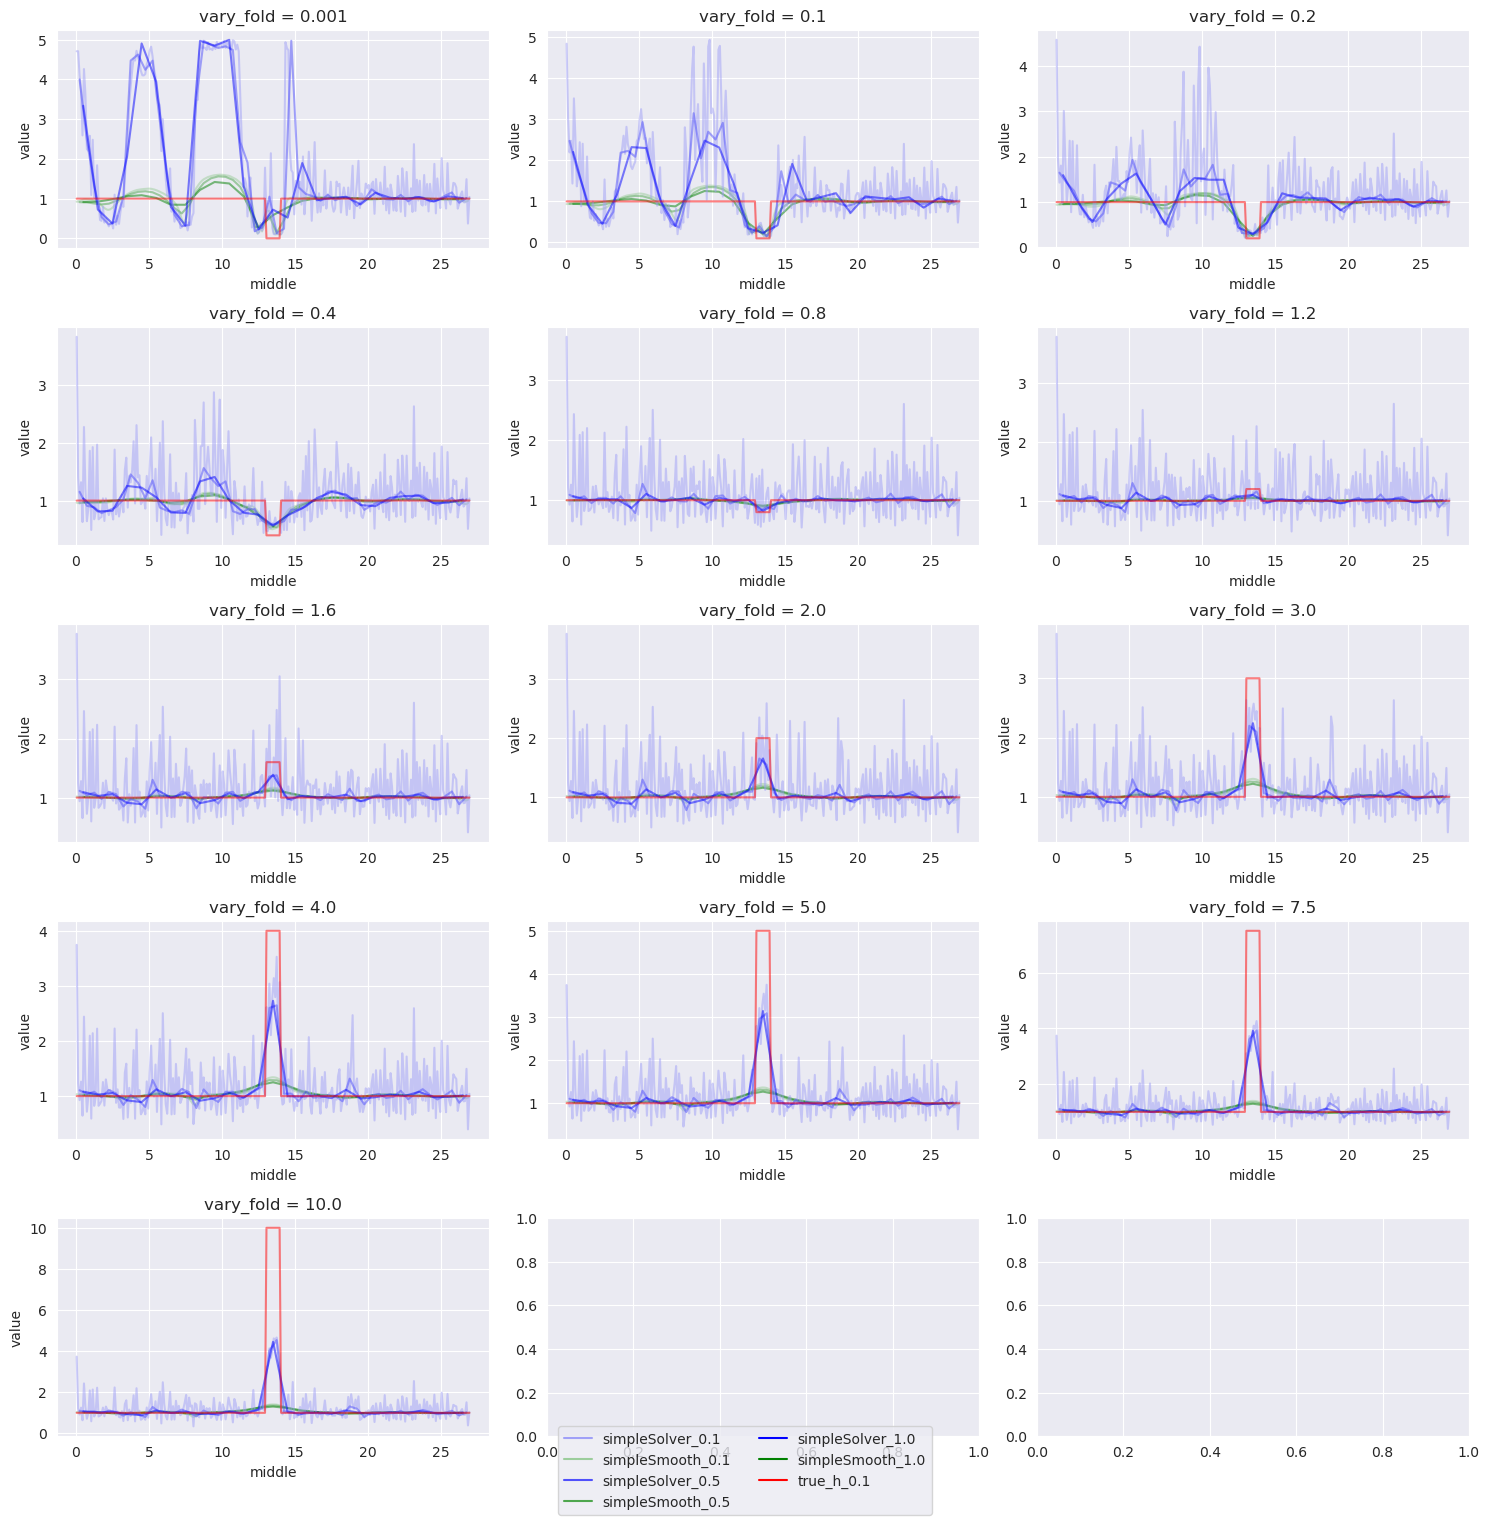

(<Figure size 1500x1500 with 15 Axes>,
 array([[<Axes: title={'center': 'vary_fold = 0.001'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 0.1'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 0.2'}, xlabel='middle', ylabel='value'>],
        [<Axes: title={'center': 'vary_fold = 0.4'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 0.8'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 1.2'}, xlabel='middle', ylabel='value'>],
        [<Axes: title={'center': 'vary_fold = 1.6'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 2.0'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 3.0'}, xlabel='middle', ylabel='value'>],
        [<Axes: title={'center': 'vary_fold = 4.0'}, xlabel='middle', ylabel='value'>,
         <Axes: title={'center': 'vary_fold = 5.0'}, xlabel='middle', ylabel='value'>,

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def question2_plot1(run_df, methods=['simpleSmooth', 'simpleSolver'], save_fn=None):
    '''
    There are 13 subplots corresponding to 13 different vary_fold.
    For each subplot:
    - x-axis: avg of start and end
    - y-axis: simpleSmooth and simpleSolver predictions, along with true_h 
    (there should be num bin_h * 2 + 1 lines) 
    (2 methods, each has num bin_h variations, and 1 line for true_h)
    '''
    
    vary_fold_list = run_df['vary_fold'].unique()
    fig, axs = plt.subplots(5, 3, figsize=(15, 15))
    # Define custom colors for each method_binH
    unique_method_binH = run_df['h_bin'].astype(str).unique()
    print(unique_method_binH)
    # Assign colors to method_binH combinations
    blue_palette = sns.light_palette("blue", reverse=False, n_colors=len(unique_method_binH)+1)
    green_palette = sns.light_palette("green", reverse=False, n_colors=len(unique_method_binH)+1)
    red_color = "red"
    color_dict = {}
    for h_idx, h_bin in enumerate(unique_method_binH):
        color_dict[f'simpleSolver_{h_bin}'] = blue_palette[h_idx+1]  # Map to blue shades
        color_dict[f'simpleSmooth_{h_bin}'] = green_palette[h_idx+1]  # Map to green shades
    color_dict['true_h_0.1'] = red_color
    
    handles_labels = {} # To store legend handles and labels
    for i, vary_fold in enumerate(vary_fold_list):
        ax = axs[i // 3, i % 3]
        sub_df = run_df[run_df['vary_fold'] == vary_fold].copy()
        sub_df['middle'] = (sub_df['start'] + sub_df['end']) / 2
        melt_df = pd.melt(
            sub_df,
            id_vars=['middle', 'h_bin'],
            value_vars=methods + ['true_h'],
            var_name='method',
            value_name='value'
        )
        # Filter rows where true_h has non-default h_bin
        melt_df = melt_df[~((melt_df['method'] == 'true_h') & (melt_df['h_bin'] != 0.1))]
        melt_df['method_binH'] = melt_df['method'] + '_' + melt_df['h_bin'].astype(str)
        sns.lineplot(
            x='middle', y='value', hue='method_binH', data=melt_df, ax=ax,
            palette=color_dict, legend=False, alpha= 0.5
        )
        ax.set_title(f'vary_fold = {vary_fold}')
        
        for method_binH, color in color_dict.items():
            handles_labels[method_binH], = ax.plot([], [], label=method_binH, color=color)
    # Filter out duplicates for the shared legend
    print(handles_labels)
    fig.legend(handles_labels.values(), handles_labels.keys(), loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2)
    plt.tight_layout()
    if save_fn:
        plt.savefig(save_fn)
    plt.show()
    return fig, axs

    
question2_plot1(run_df, save_fn = f'{output_folder}/question2_plot1.png')

/tmp/ipykernel_3357395/3904600294.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to accommodate colorbar


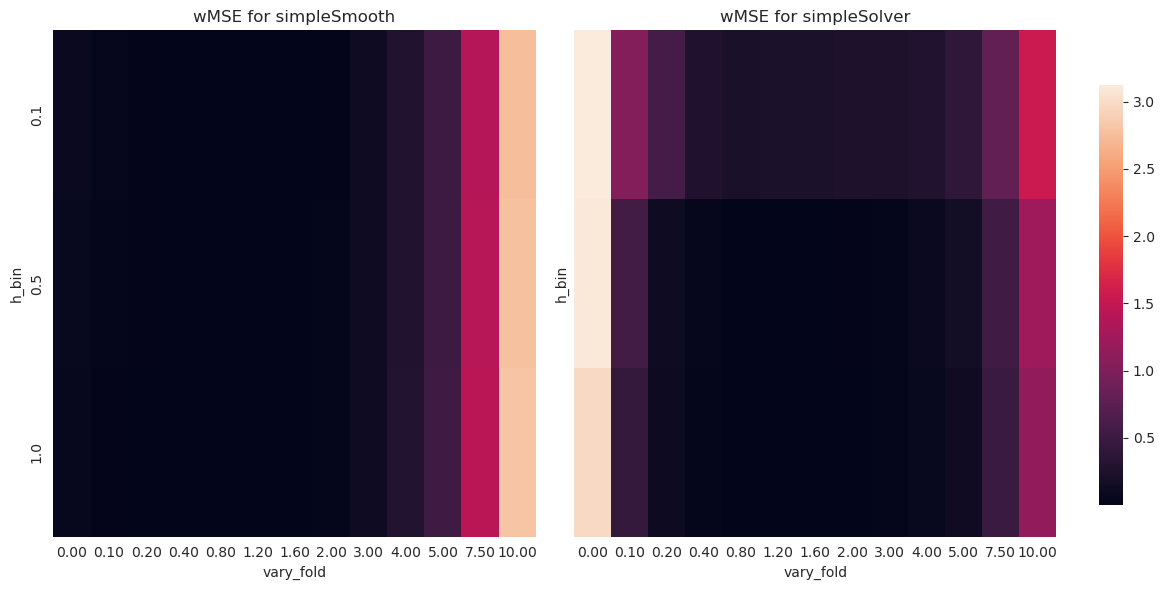

(<Figure size 1200x600 with 3 Axes>,
 array([<Axes: title={'center': 'wMSE for simpleSmooth'}, xlabel='vary_fold', ylabel='h_bin'>,
        <Axes: title={'center': 'wMSE for simpleSolver'}, xlabel='vary_fold', ylabel='h_bin'>],
       dtype=object))

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

def question2_plot3(result_df, metric='wFC', save_fn=None, methods=['simpleSmooth', 'simpleSolver']):
    '''
    Heatmap for wMSE/wFC:
    - x-axis: different values of true_h (vary_fold)
    - y-axis: different values of h_bin
    - heatmap: values of wMSE/wFC for each method
    '''
    result_df['true_h'] = result_df['G'] / result_df['time_traverse_gene']
    num_methods = len(methods)

    # Determine vmin and vmax for consistent color scales
    vmin = result_df[[f'{metric}_{method}' for method in methods]].min().min()
    vmax = result_df[[f'{metric}_{method}' for method in methods]].max().max()

    fig, axes = plt.subplots(1, num_methods, figsize=(6 * num_methods, 6), sharex=True, sharey=True)

    # Add a colorbar axis to share the colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position for shared colorbar
    
    for i, method in enumerate(methods):
        ax = axes[i]
        sns.heatmap(
            data=result_df.pivot(index='h_bin', columns='vary_fold', values=f'{metric}_{method}'),
            ax=ax, vmin=vmin, vmax=vmax, cbar=i == 0, cbar_ax=None if i else cbar_ax,  # Share colorbar, only the first ax gets the color bar next to it
            cmap=None
        )
        ax.set_title(f'{metric} for {method}')
        ax.set_xlabel('vary_fold')
        ax.set_ylabel('h_bin')

        # Format x-axis labels
        x_labels = ax.get_xticklabels()
        x_labels = [f'{float(label.get_text()):.2f}' for label in x_labels]
        ax.set_xticklabels(x_labels)

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to accommodate colorbar

    if save_fn:
        plt.savefig(save_fn)

    plt.show()
    return fig, axes


question2_plot3(result_df, metric='wMSE', save_fn=os.path.join(output_folder, 'question2_plot3.png'))
